In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('data/interactions.json') as f:
    ddi_json = json.load(f)

In [3]:
df_drugs = pd.read_csv('data/filtered_dataset.csv')
df_drugs

,Unnamed: 0,name,state,level4,level3,level2,level1,Molecular Weight,logP,Water Solubility,...,Rotatable Bond Count,Polar Surface Area (PSA),pKa (strongest basic),Ghose Filter,Monoisotopic Weight,MDDR-Like Rule,Polarizability,H Bond Acceptor Count,Physiological Charge,Rule of Five
0,5,Bivalirudin,solid,B01AE,B01A,B01,B,2180.2853,-14.00,0.04640,...,66.0,901.57,11.88,0.0,2178.985813,1.0,218.54,37.0,-4.0,0.0
1,6,Leuprolide,solid,L02AE,L02A,L02,L,1209.3983,-2.40,0.03380,...,32.0,429.04,11.92,0.0,1208.645462,1.0,125.24,16.0,1.0,0.0
2,13,Goserelin,solid,L02AE,L02A,L02,L,1269.4105,-5.10,0.02830,...,33.0,495.89,10.91,0.0,1268.641439,1.0,130.74,18.0,1.0,0.0
3,25,Gramicidin D,liquid,R02AB,R02A,R02,R,1811.2530,5.96,0.00390,...,50.0,519.89,NaN,0.0,1810.033419,1.0,194.73,16.0,0.0,0.0
4,33,Desmopressin,solid,H01BA,H01B,H01,H,1069.2200,-6.10,0.11000,...,19.0,435.41,11.77,0.0,1068.426956,1.0,104.78,15.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,14553,Belumosudil,solid,L04AA,L04A,L04,L,452.5180,4.65,0.00289,...,7.0,104.82,4.11,0.0,452.196074,1.0,49.55,6.0,0.0,1.0
2626,14688,Tebipenem pivoxil,NaN,J01DH,J01D,J01,J,497.6300,1.59,0.16700,...,9.0,108.74,6.27,0.0,497.165428,1.0,53.39,6.0,0.0,1.0
2627,14698,Tosufloxacin,NaN,J01MA,J01M,J01,J,404.3490,0.47,0.07620,...,3.0,99.76,9.80,1.0,404.109625,0.0,37.18,7.0,0.0,1.0
2628,14931,Linzagolix,solid,H01CC,H01C,H01,H,508.4200,3.88,0.00198,...,6.0,114.40,-3.50,0.0,508.055206,1.0,45.39,7.0,-1.0,0.0


In [4]:
def adjacency_matrix(df):
    # create a matrix of zeros with the same shape as the final adjacency matrix
    matrix = np.zeros((len(df), len(df)), dtype=int)

    # loop through each drug and set the corresponding values in the matrix to 1
    for i, drug in enumerate(df['name']):
        interacting_drugs = ddi_json[drug]
        indices = df.index[df['name'].isin(interacting_drugs)].tolist()
        matrix[i, indices] = 1

    # convert the matrix to a dataframe and set the column names and index
    df_matrix = pd.DataFrame(matrix, columns=df['name'], index=df['name'])

    return df_matrix

df_matrix = adjacency_matrix(df_drugs)

In [5]:
df_matrix

name,Bivalirudin,Leuprolide,Goserelin,Gramicidin D,Desmopressin,Cetrorelix,Daptomycin,Abarelix,Pyridoxal phosphate,Cyanocobalamin,...,Naphthoquine,Odevixibat,Melphalan flufenamide,Deucravacitinib,Tegoprazan,Belumosudil,Tebipenem pivoxil,Tosufloxacin,Linzagolix,Methionine C-11
name,,,,,,,,,,,,,,,,,,,,,
Bivalirudin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leuprolide,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Goserelin,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Gramicidin D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Desmopressin,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belumosudil,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Tebipenem pivoxil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tosufloxacin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import itertools
def random_drug_pairs(names, p, random_state=None):
    """
    Selects p% of all possible pairs of names selected at random from a pandas series of names.
    
    Parameters:
    names (pandas.Series): A pandas series of names.
    p (float): The percentage of pairs to select (between 0 and 1).
    random_state (int, optional): Seed for the random number generator.
    
    Returns:
    pandas.Series: A pandas series of selected pairs of names.
    """
    # Calculate the total number of possible pairs
    num_pairs = int(len(names) * (len(names) - 1) / 2)

    # Calculate the number of pairs to select
    num_selected_pairs = int(p * num_pairs)

    # Generate all possible pairs of names using itertools
    all_pairs = list(itertools.combinations(names, 2))

    # Select a random subset of pairs
    selected_pairs = pd.Series(all_pairs).sample(n=num_selected_pairs, random_state=random_state)

    # Return the selected pairs
    return selected_pairs

def exclude_pairs_from_adjacency_matrix(df_matrix, excluded_pairs):
    col_inds1 = np.array([df_matrix.columns.get_loc(drug1) for drug1, _ in excluded_pairs])
    col_inds2 = np.array([df_matrix.columns.get_loc(drug2) for _, drug2 in excluded_pairs])
    values = df_matrix.values[col_inds1, col_inds2]
    df_matrix.values[col_inds1, col_inds2] = 0
    df_matrix.values[col_inds2, col_inds1] = 0
    return values

def get_pairs_from_adjacency_matrix(df_matrix, excluded_pairs):
    col_inds1 = np.array([df_matrix.columns.get_loc(drug1) for drug1, _ in excluded_pairs])
    col_inds2 = np.array([df_matrix.columns.get_loc(drug2) for _, drug2 in excluded_pairs])
    values = df_matrix.values[col_inds1, col_inds2]
    return values

In [7]:
# train, test split 
# train set : remove selected pairs from adj matrix
# test set: the excluded pairs
excluded_pairs = random_drug_pairs(df_drugs['name'], 0.20, 42)
excluded_pair_values = exclude_pairs_from_adjacency_matrix(df_matrix, excluded_pairs)

In [8]:
from sknetwork.linkpred import NNLinker
from sknetwork.visualization import svg_graph, svg_bigraph
linker = NNLinker(n_neighbors=2630, threshold=0)
links = linker.fit_predict(df_matrix.to_numpy())

c:\Users\Georg\anaconda3\lib\site-packages\sknetwork\utils\check.py:216: Warning: The number of neighbors must be lower than the number of nodes with known labels. Changed accordingly.
  warnings.warn(Warning("The number of neighbors must be lower than the number of nodes with known labels. "


In [9]:
df_predicted = pd.DataFrame.sparse.from_spmatrix(links)
df_predicted.columns = df_matrix.columns
df_predicted

name,Bivalirudin,Leuprolide,Goserelin,Gramicidin D,Desmopressin,Cetrorelix,Daptomycin,Abarelix,Pyridoxal phosphate,Cyanocobalamin,...,Naphthoquine,Odevixibat,Melphalan flufenamide,Deucravacitinib,Tegoprazan,Belumosudil,Tebipenem pivoxil,Tosufloxacin,Linzagolix,Methionine C-11
0,1.000000,0.306150,0.288741,0.083090,0.310237,0.0,0.338457,0.0,0.0,0.430352,...,0.0,0.0,0.0,0.305532,0.0,0.241866,0.0,0.0,0.105519,0.0
1,0.306150,1.000000,0.780471,0.087487,0.587482,0.0,0.645092,0.0,0.0,0.601979,...,0.0,0.0,0.0,0.167036,0.0,0.242198,0.0,0.0,0.156851,0.0
2,0.288741,0.780471,1.000000,0.110648,0.603694,0.0,0.614604,0.0,0.0,0.608478,...,0.0,0.0,0.0,0.123966,0.0,0.217510,0.0,0.0,0.123984,0.0
3,0.083090,0.087487,0.110648,1.000000,0.028047,0.0,0.190443,0.0,0.0,0.032498,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.039841,0.0
4,0.310237,0.587482,0.603694,0.028047,1.000000,0.0,0.563808,0.0,0.0,0.630617,...,0.0,0.0,0.0,0.099909,0.0,0.178126,0.0,0.0,0.087996,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,0.241866,0.242198,0.217510,0.000000,0.178126,0.0,0.343441,0.0,0.0,0.270278,...,0.0,0.0,0.0,0.523597,0.0,1.000000,0.0,0.0,0.186761,0.0
2626,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2627,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2628,0.105519,0.156851,0.123984,0.039841,0.087996,0.0,0.164395,0.0,0.0,0.097106,...,0.0,0.0,0.0,0.082406,0.0,0.186761,0.0,0.0,1.000000,0.0


In [10]:
predictions = get_pairs_from_adjacency_matrix(df_predicted, excluded_pairs)

In [11]:
predictions.sum()

130972.25693560754

In [12]:
import numpy as np
from sklearn import metrics
metrics.roc_auc_score(excluded_pair_values, predictions)

0.9689347313012144

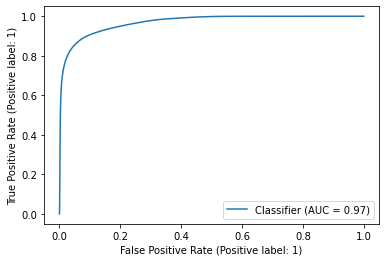

In [13]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(excluded_pair_values, predictions)